<a href="https://colab.research.google.com/github/pratikasarkar/Capstone_Project/blob/Prassanth/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv(r'/content/drive/My Drive/Capstone_Used_cars/autos.csv',encoding = "ISO-8859-1",parse_dates=['dateCrawled','dateCreated','lastSeen'],
                 infer_datetime_format=True)

In [0]:
df1 = df.copy()
df1['No_of_days_online'] = (df1['lastSeen'] - df1['dateCreated']).dt.days
df1.drop(columns=['seller','offerType','dateCrawled' , 'name' , 'nrOfPictures','postalCode','lastSeen','dateCreated'],inplace = True)

In [0]:
#df1[df1['No_of_days_online'] >50]

In [0]:
df1.drop(df1[(df1['price'] < 100) | (df1['price'] > 100000)].index , axis =0, inplace = True)     #13723 
df1.drop(df1[(df1['powerPS'] < 40) | (df1['powerPS'] > 800)].index,inplace=True)    #42627
df1.drop(df1[(df1['yearOfRegistration'] < 1995) | (df1['yearOfRegistration'] > 2017)].index,inplace = True)   #24807

In [7]:
df2 = df1.dropna()     #64717
df2.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,No_of_days_online
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,0
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,6
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,4
10,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,11


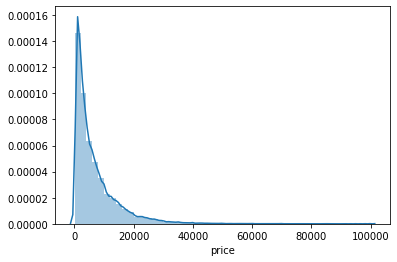

In [8]:
sns.distplot(df2.price)

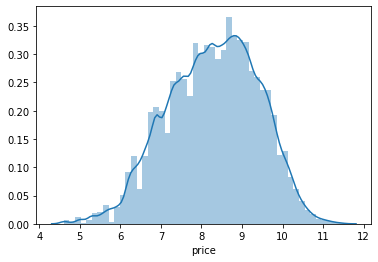

In [9]:
sns.distplot(np.log(df2.price))

In [0]:
df2['price'] = np.log(df2['price'])

In [11]:
#Normality test
test_stat,p_value = st.shapiro(df2['price'])
print(f'P value for normality test is {p_value}')

P value for normality test is 0.0


In [0]:
#Statistical Significance testing
#2 sample independent T test
# gearbox , abtest , not repaired damage

In [13]:
for i in ['gearbox' , 'abtest' , 'notRepairedDamage']:
    a = df2[df2[i] == df2[i].unique()[0]]['price']
    b = df2[df2[i] == df2[i].unique()[1]]['price']
    test_stat , pval = st.ttest_ind(a,b)
    print(f'Pvalue for {i} is {pval}')

Pvalue for gearbox is 0.0
Pvalue for abtest is 0.6968668485863598
Pvalue for notRepairedDamage is 0.0


In [0]:
#1 way anova
#vehicle type , yearOfRegistration , kilometer , monthof reg , fuel type , brand , 

In [0]:
#afunction(*list(dic.values()))

In [16]:
for i in ['vehicleType' , 'yearOfRegistration' , 'kilometer' , 'monthOfRegistration' , 'fuelType' , 'brand','model']:
    #print(i)
    cat = {}
    for j in range(df2[i].nunique()):
        cat[df2[i].unique()[j]] = df2[df2[i] == df2[i].unique()[j]]['price']
    #print({key: len(value) for key, value in cat.items()})
    tstat , pval = st.f_oneway(*list(cat.values()))
    print(f'P-value for {i} is {pval}')

P-value for vehicleType is 0.0
P-value for yearOfRegistration is 0.0
P-value for kilometer is 0.0
P-value for monthOfRegistration is 0.0
P-value for fuelType is 0.0
P-value for brand is 0.0
P-value for model is 0.0


In [0]:
#Varience test
#Powerps 

In [18]:
st.levene(df2['powerPS'],df2['price'])

LeveneResult(statistic=227588.4243381003, pvalue=0.0)

In [0]:
#number of days online

In [20]:
st.levene(df2['No_of_days_online'],df2['price'])

LeveneResult(statistic=221146.49302722447, pvalue=0.0)

In [0]:
df2.drop(columns='abtest',inplace = True)

In [0]:
df2.dropna(inplace = True)

### Chossing best Encdoing method

In [0]:
X = df2.drop(columns='price')
y = df2.price

In [0]:
# cat_cols = [i for i in X.columns if df2[i].dtypes == 'O']
# num_cols = [i for i in X.columns if df2[i].dtypes != 'O']

In [0]:
cat_cols = ['vehicleType','gearbox','model','fuelType','brand','notRepairedDamage' , 'yearOfRegistration','kilometer']
num_cols = ['powerPS' , 'No_of_days_online']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3 , random_state = 3)

##### One Hot Encoding

In [27]:
def OHE(df):

    df_OHE = pd.concat([df[num_cols], pd.get_dummies(df[cat_cols], drop_first=True)],axis=1)
    return df_OHE

X_train_OHE = OHE(X_train)
X_test_OHE = OHE(X_test)

X_train_OHE.head()

,powerPS,No_of_days_online,yearOfRegistration,kilometer,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,gearbox_manuell,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_6_reihe,model_6er,model_7er,model_80,model_850,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,...,fuelType_hybrid,fuelType_lpg,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,notRepairedDamage_nein
232438,260,6,2007,125000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
313967,260,26,2008,125000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
350377,150,0,2007,150000,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
225864,144,3,2003,150000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
76000,190,12,2007,125000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


##### Count Encoding

In [28]:
def categorical_to_counts(df_train, df_test):
    #df copy
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    for col in cat_cols:
        counts_map = df_train_temp[col].value_counts().to_dict()
        df_train_temp[col] = df_train_temp[col].map(counts_map)
        df_test_temp[col] = df_test_temp[col].map(counts_map)
    return df_train_temp, df_test_temp

X_train_count, X_test_count = categorical_to_counts(X_train, X_test)
X_train_count.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,No_of_days_online
232438,46797,10108,124135,260,1665,18373,5,101916,2523,147018,6
313967,46797,9377,124135,260,625,18373,3,101916,2523,147018,26
350377,7667,10108,124135,150,48,98645,2,57808,16497,147018,0
225864,46797,10352,124135,144,562,98645,7,101916,16497,147018,3
76000,46797,10108,38512,190,10429,18373,9,57808,15941,147018,12


##### Mean Encoding

In [29]:
def cat_to_mean(df_train, df_test, y_train, y_test):
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()

    for col in cat_cols:
        ordered_labels = df_train_temp.groupby(
            [col])['price'].mean().to_dict()
        # Mapping
        df_train_temp[col] = df_train[col].map(ordered_labels)
        df_test_temp[col] = df_test[col].map(ordered_labels)

    # remove the target
    df_train_temp.drop(['price'], axis=1, inplace=True)
    df_test_temp.drop(['price'], axis=1, inplace=True)

    return df_train_temp, df_test_temp


X_train_mean, X_test_mean = cat_to_mean(
    X_train, X_test, y_train, y_test)

X_train_mean.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,No_of_days_online
232438,8.321099,8.827949,8.087280,260,7.811274,8.403415,5,8.009539,8.017123,8.395805,6
313967,8.321099,9.000783,8.087280,260,7.917101,8.403415,3,8.009539,8.017123,8.395805,26
350377,9.277144,8.827949,8.087280,150,9.081411,7.914756,2,8.774589,7.704902,8.395805,0
225864,8.321099,7.960123,8.087280,144,6.939737,7.914756,7,8.009539,7.704902,8.395805,3
76000,8.321099,8.827949,8.920681,190,8.280942,8.403415,9,8.774589,8.716343,8.395805,12


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

# rfr = RandomForestRegressor(n_jobs=-1)
# rfr.fit(X_train_OHE,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# predict = rfr.predict(X_test_OHE)

In [0]:
# mean_squared_error(y_test,predict)

0.13994983956055934

In [0]:
def eval(X,y):
    for i in (LinearRegression() , LassoCV() , RandomForestRegressor(max_depth=5,n_jobs=-1)):
        scoring = 'neg_mean_squared_error'
        kfold = model_selection.KFold(n_splits=10, random_state=3)
        results = model_selection.cross_val_score(i, X, y, cv=kfold, scoring=scoring)
        print(("MSE for %s: %.3f (%.3f)") % (str(i).split('(')[0],results.mean(), results.std()))

In [33]:
eval(X_train_mean,y_train)


MSE for LinearRegression: -0.183 (0.005)
MSE for LassoCV: -0.217 (0.005)
MSE for RandomForestRegressor: -0.238 (0.005)


In [34]:
eval(X_train_count,y_train)

MSE for LinearRegression: -0.456 (0.007)
MSE for LassoCV: -0.617 (0.006)
MSE for RandomForestRegressor: -0.403 (0.005)


In [35]:
eval(X_train_OHE,y_train)

MSE for LinearRegression: -0.159 (0.005)
MSE for LassoCV: -0.709 (0.006)
MSE for RandomForestRegressor: -0.261 (0.007)


In [0]:
###Going with mean encoding

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [0]:
X_train_scaled = X_train_mean
X_test_scaled = X_test_mean
scaler = StandardScaler()
scaler.fit(X_train_mean)
X_train_scaled.iloc[:,:] = scaler.transform(X_train_mean)
X_test_scaled.iloc[:,:] = scaler.transform(X_test_mean)

In [49]:
#Knn Hyperparameter tuning
knn=KNeighborsRegressor()
param={'n_neighbors':np.arange(3,100),'weights':['uniform','distance']}
gsearch_knn=RandomizedSearchCV(knn,param,cv=10,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)
gsearch_knn.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 19.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,..., 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'weights'

In [50]:
gsearch_knn.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [0]:
rsearch_knn_best_params = {'n_neighbors': 12, 'weights': 'distance'}

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfr = RandomForestRegressor(random_state=3)
params_rfr = { 'n_estimators' : sp_randint(100 , 400) , 
           'max_features' : ['log2','sqrt'] ,
           'max_depth' : sp_randint(2,10) , 
           'min_samples_leaf' : [0.1, 0.2] }

rsearch_rfc = RandomizedSearchCV(estimator=rfr,param_distributions=params_rfr,cv=10,
                                 scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)

rsearch_rfc.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [46]:
rsearch_rfc.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 154}

In [0]:
rsearch_rfc_best_params ={'max_depth': 6,
                          'max_features': 'log2',
                          'min_samples_leaf': 0.1,
                          'n_estimators': 154}

In [0]:
LR = LinearRegression()
KNN = KNeighborsRegressor(**rsearch_knn_best_params,n_jobs=-1)

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
LR_bag=BaggingRegressor(base_estimator=LR,n_estimators=25,random_state=3,n_jobs=-1)
KNN_bag=BaggingRegressor(base_estimator=KNN,n_estimators=80,random_state=3,n_jobs=-1)
DT_reg=DecisionTreeRegressor(max_depth=4,random_state=3)
RF=RandomForestRegressor(**rsearch_rfc_best_params,random_state=3,n_jobs=-1)
#Boosting models
LR_boost=AdaBoostRegressor(base_estimator=LR,n_estimators=50)
RF_boost=AdaBoostRegressor(base_estimator=RF,n_estimators=70)
DT_boost=AdaBoostRegressor(n_estimators=50)

In [0]:
RMSE scores: 0.43 (+/- 0.00003) [Lin Reg]
Adj R-Square:0.85 (+/- 0.00001)[Lin Reg]
--------------------------------------------------
RMSE scores: 0.39 (+/- 0.00002) [KNN Reg]
Adj R-Square:0.88 (+/- 0.00001)[KNN Reg]
--------------------------------------------------
RMSE scores: 0.55 (+/- 0.00004) [Decision Tree]
Adj R-Square:0.75 (+/- 0.00002)[Decision Tree]
--------------------------------------------------
RMSE scores: 0.67 (+/- 0.00001) [Random Forest Reg]
Adj R-Square:0.64 (+/- 0.00001)[Random Forest Reg]
--------------------------------------------------
RMSE scores: 0.43 (+/- 0.00003) [LR_Bag]
Adj R-Square:0.85 (+/- 0.00001)[LR_Bag]
--------------------------------------------------
RMSE scores: 0.50 (+/- 0.00003) [LR_Boost]
Adj R-Square:0.80 (+/- 0.00002)[LR_Boost]
--------------------------------------------------
RMSE scores: 0.61 (+/- 0.00006) [RF_boost]
Adj R-Square:0.70 (+/- 0.00006)[RF_boost]
--------------------------------------------------
RMSE scores: 0.76 (+/- 0.00086) [DT_boost]
Adj R-Square:0.54 (+/- 0.00125)[DT_boost]
--------------------------------------------------

In [58]:
X = X_train_scaled
Y = y_train
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True,random_state=3)
for model, name in zip([LR,KNN,DT_reg,RF,LR_bag,LR_boost,RF_boost,DT_boost]
                       ,['Lin Reg','KNN Reg','Decision Tree' ,'Random Forest Reg','LR_Bag','LR_Boost','RF_boost','DT_boost']):
    rmse = [];adj_r=[]
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        met=np.sqrt(mean_squared_error(Ytest,Y_predict))
        rmse.append(met)
        Adj_r2 = 1-(1-metrics.r2_score(Ytest,Y_predict))*(X_test.shape[0] -1)/(X_test.shape[0]-X_test.shape[1]-1)
        adj_r.append(Adj_r2)
    print("RMSE scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(rmse),
                                    np.var(rmse,ddof=1), name ))
    print('Adj R-Square:%0.02f (+/- %0.5f)[%s]' % (np.mean(adj_r),
                                    np.var(adj_r,ddof=1), name ))
    print('-'*50)

RMSE scores: 0.43 (+/- 0.00003) [Lin Reg]
Adj R-Square:0.85 (+/- 0.00001)[Lin Reg]
--------------------------------------------------
RMSE scores: 0.39 (+/- 0.00002) [KNN Reg]
Adj R-Square:0.88 (+/- 0.00001)[KNN Reg]
--------------------------------------------------
RMSE scores: 0.55 (+/- 0.00004) [Decision Tree]
Adj R-Square:0.75 (+/- 0.00002)[Decision Tree]
--------------------------------------------------
RMSE scores: 0.67 (+/- 0.00001) [Random Forest Reg]
Adj R-Square:0.64 (+/- 0.00001)[Random Forest Reg]
--------------------------------------------------
RMSE scores: 0.43 (+/- 0.00003) [LR_Bag]
Adj R-Square:0.85 (+/- 0.00001)[LR_Bag]
--------------------------------------------------
RMSE scores: 0.50 (+/- 0.00003) [LR_Boost]
Adj R-Square:0.80 (+/- 0.00002)[LR_Boost]
--------------------------------------------------
RMSE scores: 0.61 (+/- 0.00006) [RF_boost]
Adj R-Square:0.70 (+/- 0.00006)[RF_boost]
--------------------------------------------------
RMSE scores: 0.76 (+/- 0.000